# Big data course 
@Liubov, Marc

# Network visualisations

Second seminar on network theory and applications. Here we start with simple function `nx.draw(G)` from networkx.

In [1]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


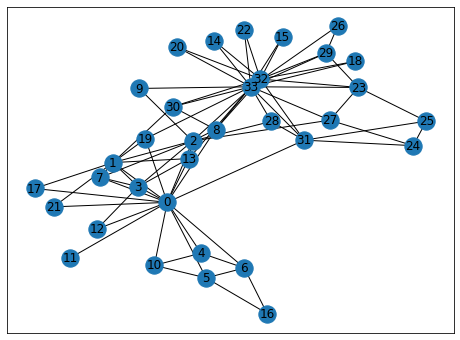

In [2]:
g = nx.karate_club_graph()
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(g, ax=ax)

## Visualisation with attributes 
We can also use additional functions from networkx such as 
`draw_networkx_nodes()`,`draw_networkx_edges()`, `draw_networkx_labels()`, `draw_networkx_edge_labels()`.

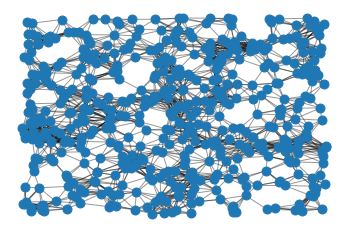

In [4]:

G = nx.random_geometric_graph(500, 0.1)

# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')
#print('position', pos)

dmin =1
ncenter =0 # position of central node in graph
for n in pos: # we calculate positions of each node in geometric graph
    x,y = pos[n]
    d = (x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter = n
        dmin = d
 
    
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_nodes(G, pos, node_size = 80, 
                       cmap = plt.get_cmap('Reds_r'))



plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

# Network layouts 

Network layouts are important. You can find different ones when you search layout networkx, e.g. ` nx.fruchterman_reingold_layout(G)`

**Tips**: Sometimes you can load your network as dataframe (see pandas dataframe documentation). This allows you to plot some additional features faster.

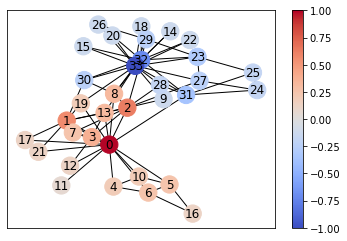

In [6]:
import pandas as pd
import networkx as nx    
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

df = (pd.DataFrame(list(G.degree), columns=['node','degree'])
        .set_index('node'))
df['club'] = pd.Series({node:data['club']
                        for node,data in G.nodes(data=True)})
df['color'] = df.groupby('club')['degree'].transform(lambda c: c/c.max())
df.loc[df['club']=='Officer', 'color'] *= -1

layout = nx.fruchterman_reingold_layout(G)
vmin = df['color'].min()
vmax = df['color'].max()
cmap = plt.cm.coolwarm

nx.draw_networkx(G, pos=layout, with_labels=True, node_color=df['color'],
                 cmap=cmap, vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

# degree colorbar is normalised and is calculated for different communities
cbar = plt.colorbar(sm)


# Try to plot your network!

Now try to plot your network of choice.
You can use any of ones from http://networkrepository.com/networks.php



## Additional visualisation 
 Now, we're going to display this graph in the notebook with D3.js. The first step is to bring this graph to JavaScript. Here, we choose to export the graph to JSON. 


In [5]:
# this is additional part if you would like more difficul visualisations
import json

nodes = [{'name': str(i), 'club': g.node[i]['club']}
         for i in g.nodes()]
links = [{'source': u[0], 'target': u[1]}
         for u in g.edges()]
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links},
              f, indent=4,)


Next we can create html and visualise network in D3.js
<div id="d3-example"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

But here we want to use better the Gephi visualisation. (See tutorial from Marc Santolini). 
Other types of visualisation can be found in http://networkrepository.com/soc-karate.php where the data for Karate club can be downloaded.